# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Loading the raw dataset

In [2]:
raw_data = pd.read_csv("Vehicle Price.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Data Preprocessing

## Descriptive statistics of the variables

In [4]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determining the variables of interest

In [5]:
data = raw_data.drop(["Model"], axis=1)

### A lot of the information from model could be analyzed from the brand. Hence, dropping the model column shouldn't affect the accuracy of the model.

In [6]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values

In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Since the number of missing values is less than 5% of the total data, the rows are simply dropped. 

In [8]:
data_nomv = data.dropna(axis=0)

In [9]:
data_nomv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Analyzing the Probability Distribution Functions (PDFs)

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

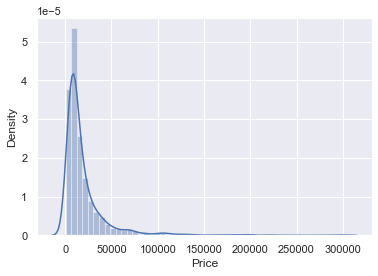

In [10]:
sns.distplot(data_nomv["Price"])

## Dealing with Outliers

### Removing the top 1% of the observations

In [11]:
q = data_nomv["Price"].quantile(0.99)
data99_1 = data_nomv[data["Price"] < q]
data99_1.describe(include="all")

<ipython-input-11-abd84e5b153f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data99_1 = data_nomv[data["Price"] < q]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

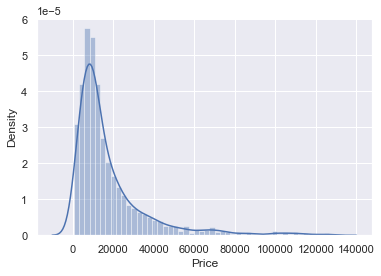

In [12]:
sns.distplot(data99_1["Price"])

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

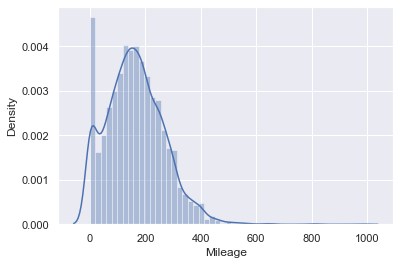

In [13]:
sns.distplot(data_nomv["Mileage"])

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

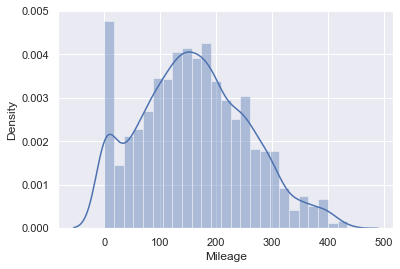

In [14]:
q = data99_1["Mileage"].quantile(0.99)
data99_2 = data99_1[data99_1["Mileage"]<q]
sns.distplot(data99_2["Mileage"])

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

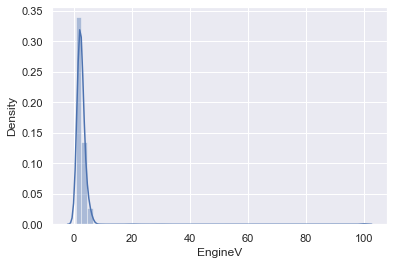

In [15]:
sns.distplot(data_nomv["EngineV"])

### On doing a quick research about engine volumes, it has been noted that the engine volumes typically lie between 0.6 to 6 litres.

In [16]:
data_3 = data99_2[data99_2["EngineV"]<=6]

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

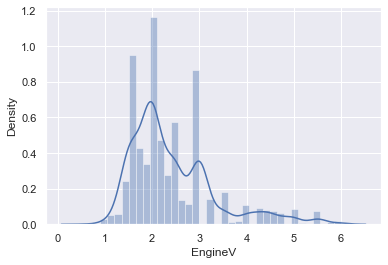

In [17]:
sns.distplot(data_3["EngineV"])

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

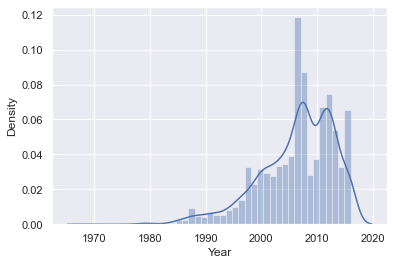

In [18]:
sns.distplot(data_nomv["Year"])

In [19]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

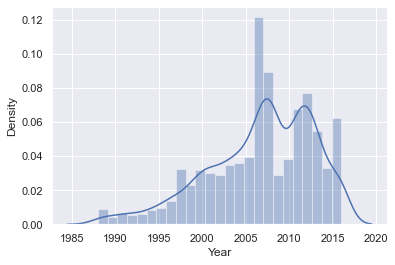

In [20]:
sns.distplot(data_4["Year"])

In [21]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [22]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [23]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3846,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3847,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3848,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3849,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [24]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3851,3851.00000,3851,3851.000000,3851.000000,3851,3851,3851.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1458,NaN,NaN,1807,3489,NaN
mean,NaN,18076.98263,NaN,160.837445,2.434524,NaN,NaN,2006.699039
std,NaN,19004.80061,NaN,95.680787,0.918583,NaN,NaN,6.112839
min,NaN,800.00000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.00000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.00000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.00000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


## OLS Assumptions

Text(0, 0.5, 'Price')

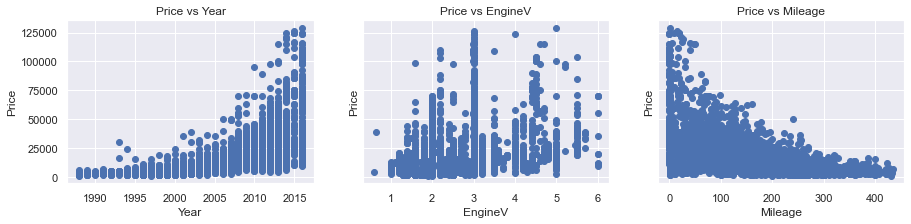

In [25]:
data = data_cleaned
f, (g1,g2,g3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
g1.scatter(data["Year"], data["Price"])
g1.set_title("Price vs Year")
g1.set_xlabel("Year")
g1.set_ylabel("Price")
g2.scatter(data["EngineV"], data["Price"])
g2.set_title("Price vs EngineV")
g2.set_xlabel("EngineV")
g2.set_ylabel("Price")
g3.scatter(data["Mileage"], data["Price"])
g3.set_title("Price vs Mileage")
g3.set_xlabel("Mileage")
g3.set_ylabel("Price")

### Relaxing the assumptions

In [26]:
log_price = np.log(data["Price"])
data["Log Price"] = log_price
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3846,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3847,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3848,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3849,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


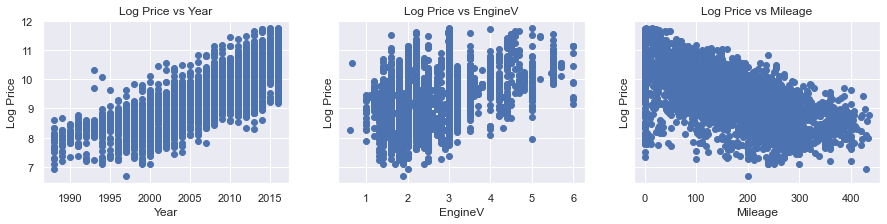

In [27]:
f, (g1,g2,g3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
g1.scatter(data["Year"], data["Log Price"])
g1.set_title("Log Price vs Year")
g1.set_xlabel("Year")
g1.set_ylabel("Log Price")
g2.scatter(data["EngineV"], data["Log Price"])
g2.set_title("Log Price vs EngineV")
g2.set_xlabel("EngineV")
g2.set_ylabel("Log Price")
g3.scatter(data["Mileage"], data["Log Price"])
g3.set_title("Log Price vs Mileage")
g3.set_xlabel("Mileage")
g3.set_ylabel("Log Price")
plt.show()

In [28]:
data = data.drop(["Price"], axis=1)
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3846,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3847,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3848,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3849,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


## Multicollinearity

In [29]:
data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[["Year","EngineV","Mileage"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [31]:
vif

,VIF,Features
0,10.607002,Year
1,8.026645,EngineV
2,3.800838,Mileage


### In this analysis, VIF > 10 is considered to be unacceptable and hence the "year" column will be dropped.

In [32]:
data = data.drop(["Year"], axis=1)
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3846,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3847,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3848,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3849,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Handling Categorical data - Creating dummy variables

In [33]:
data = pd.get_dummies(data,drop_first=True)
data

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3847,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3848,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3849,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [34]:
data.columns

Index(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [35]:
cols = ['Log Price','Mileage', 'EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
data_preprocessed = data[cols]

In [36]:
data_preprocessed

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3847,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3848,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3849,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

### Declaring the targets and inputs

In [37]:
target = data_preprocessed["Log Price"]
inputs = data_preprocessed.drop("Log Price", axis=1)

### Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [39]:
inputs_scaled= scaler.transform(inputs)

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=365)

### Creating the regression

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_hat = reg.predict(x_train)

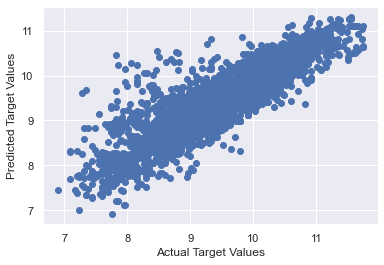

In [43]:
plt.scatter(y_train, y_hat)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.show()

D:\deven_anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


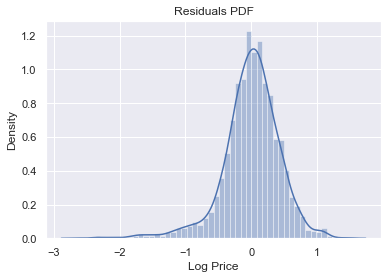

In [44]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF")
plt.show()

In [45]:
reg.score(x_train, y_train)

0.7502077015769282

### Finding the weights and bias

In [46]:
bias = reg.intercept_
weights = reg.coef_

In [47]:
summary = pd.DataFrame()
summary["Features"] = inputs.columns
summary["Weights"] =weights
summary

,Features,Weights
0,Mileage,-0.004815
1,EngineV,0.230744
2,Brand_BMW,0.043604
3,Brand_Mercedes-Benz,0.042590
4,Brand_Mitsubishi,-0.500151
5,Brand_Renault,-0.557125
6,Brand_Toyota,-0.161900
7,Brand_Volkswagen,-0.217275
8,Body_hatch,-0.603675
9,Body_other,-0.362758


## Testing

In [48]:
yhat_test = reg.predict(x_test)

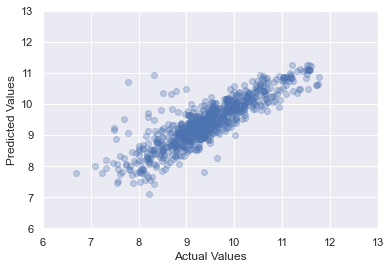

In [49]:
plt.scatter(y_test, yhat_test, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [50]:
df_performance = pd.DataFrame(np.exp(yhat_test), columns=["Prediction"])
df_performance.head()

,Prediction
0,4583.714505
1,17828.924841
2,25879.887061
3,12479.953354
4,3755.416827


In [51]:
df_performance["Actual Values"] = np.exp(y_test)
df_performance.head()

,Prediction,Actual Values
0,4583.714505,NaN
1,17828.924841,7900.0
2,25879.887061,NaN
3,12479.953354,NaN
4,3755.416827,NaN


### Something's not right. Analyzing and fixing this issue.

In [52]:
y_test

576     7.937375
3180    9.602382
3472    9.823153
2909    9.445412
1746    8.575462
          ...   
2306    9.862666
62      9.104980
1202    9.928180
1805    9.878170
2939    9.472628
Name: Log Price, Length: 771, dtype: float64

### Problem identified. Indices need to be reset.

In [53]:
y_test = y_test.reset_index(drop=True)
y_test

0      7.937375
1      9.602382
2      9.823153
3      9.445412
4      8.575462
         ...   
766    9.862666
767    9.104980
768    9.928180
769    9.878170
770    9.472628
Name: Log Price, Length: 771, dtype: float64

### Issue resolved.

In [54]:
df_performance["Actual Values"] = np.exp(y_test)
df_performance.head()

,Prediction,Actual Values
0,4583.714505,2800.00
1,17828.924841,14800.00
2,25879.887061,18456.16
3,12479.953354,12650.00
4,3755.416827,5300.00


In [55]:
df_performance["Residual"] = df_performance["Actual Values"] - df_performance["Prediction"]
df_performance.head()

,Prediction,Actual Values,Residual
0,4583.714505,2800.00,-1783.714505
1,17828.924841,14800.00,-3028.924841
2,25879.887061,18456.16,-7423.727061
3,12479.953354,12650.00,170.046646
4,3755.416827,5300.00,1544.583173


In [56]:
df_performance["% difference"] = np.absolute((df_performance["Residual"]/df_performance["Actual Values"])*100)
df_performance.head()

,Prediction,Actual Values,Residual,% difference
0,4583.714505,2800.00,-1783.714505,63.704089
1,17828.924841,14800.00,-3028.924841,20.465708
2,25879.887061,18456.16,-7423.727061,40.223573
3,12479.953354,12650.00,170.046646,1.344242
4,3755.416827,5300.00,1544.583173,29.143079


In [57]:
df_performance.describe()

,Prediction,Actual Values,Residual,% difference
count,771.000000,771.000000,771.000000,771.000000
mean,16287.650142,18499.073463,2211.423321,38.369637
std,13662.194057,20340.890729,11014.045424,91.827992
min,1234.436281,800.000000,-51194.496886,0.001466
25%,7337.681244,7300.000000,-2048.339954,11.630384
50%,11803.072104,11500.000000,383.052206,23.213272
75%,20453.640456,20949.500000,3499.697667,39.885159
max,77148.962917,129222.000000,84079.975132,1741.674505


In [58]:
df_performance.sort_values(by="% difference")

,Prediction,Actual Values,Residual,% difference
402,6500.095283,6500.00,-0.095283,0.001466
44,22732.980049,22711.65,-21.330049,0.093917
373,3791.777525,3800.00,8.222475,0.216381
289,8873.433954,8900.00,26.566046,0.298495
284,7866.448003,7900.00,33.551997,0.424709
...,...,...,...,...
423,10287.437784,1800.00,-8487.437784,471.524321
702,13769.512632,2200.00,-11569.512632,525.886938
621,31507.175380,4999.00,-26508.175380,530.269562
579,55294.496886,4100.00,-51194.496886,1248.646266
